In [1]:
import requests
import pandas as pd
import time 
import matplotlib.pyplot as plt

      

In [2]:
weather_data = []

In [3]:
weather_data

[]

In [ ]:
pip install requests


In [ ]:
weather_data = []


In [8]:
response = requests.get('https://api.openweathermap.org/data/2.5/weather?q=London&appid=a25a58822fd966d8bc2c62707d34e1ec&units=metrics')


In [9]:
import requests

# Replace with your actual OpenWeatherMap API key
API_KEY = 'a25a58822fd966d8bc2c62707d34e1ec'  

# List of cities to fetch weather data for
CITIES = ['London', 'New York', 'Tokyo']  

# OpenWeatherMap API endpoint
BASE_URL = 'https://api.openweathermap.org/data/2.5/weather'

# List to store weather data for all cities
weather_data = []

# Loop through each city and fetch weather data
for city in CITIES:
    params = {
        'q': city,         # City name from the list
        'appid': API_KEY,  # Your API key
        'units': 'metric'  # Units for temperature (metric = Celsius)
    }

    # Send GET request to OpenWeatherMap API
    response = requests.get(BASE_URL, params=params)

    # If the response is successful, parse and store the data
    if response.status_code == 200:
        data = response.json()  # Parse JSON response into a dictionary
        
        # Extract weather information
        temperature = data['main']['temp']
        weather_description = data['weather'][0]['description']
        humidity = data['main']['humidity']

        # Store the city data in the list
        weather_data.append({
            "City": city,
            "Temperature": f"{temperature}°C",
            "Weather": weather_description,
            "Humidity": f"{humidity}%"

        })
    else:
        weather_data.append({
            "City": city,
            "Temperature": "N/A",
            "Weather": "Failed to retrieve data",
            "Humidity": "N/A"

        })

# Print all city weather data in one go
print("Weather Report for All Cities:")
print("-" * 40)
for entry in weather_data:
    print(f"City: {entry['City']}")
    print(f"Temperature: {entry['Temperature']}")
    print(f"Weather: {entry['Weather']}")
    print(f"Humidity: {entry['Humidity']}")

    print('-' * 40)


Weather Report for All Cities:
----------------------------------------
City: London
Temperature: 7.54°C
Weather: light rain
Humidity: 83%
----------------------------------------
City: New York
Temperature: 0.01°C
Weather: clear sky
Humidity: 50%
----------------------------------------
City: Tokyo
Temperature: 7.32°C
Weather: light rain
Humidity: 62%
----------------------------------------


In [10]:
# Convert the weather data to a Pandas DataFrame
df = pd.DataFrame(weather_data)



In [11]:
print(df)


       City Temperature     Weather Humidity
0    London      7.54°C  light rain      83%
1  New York      0.01°C   clear sky      50%
2     Tokyo      7.32°C  light rain      62%


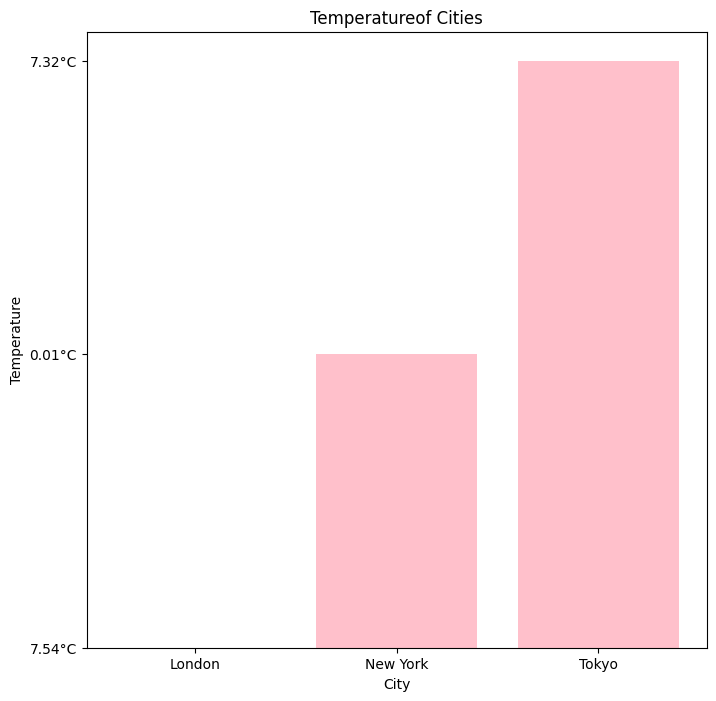

In [14]:
plt.figure(figsize=(8, 8))
plt.bar(df['City'], df['Temperature'], color='pink')
plt.xlabel('City')
plt.ylabel("Temperature")
plt.title('Temperatureof Cities')
plt.show()

In [13]:
if df['Temperature'].dtype != object:
    max_temp_city = df.loc[df['Temperature'].idxmax()]
    min_temp_city = df.loc[df['Temperature'].idxmin()]
    print(f"City with the highest temperature: {max_temp_city['City']} ({max_temp_city['Temperature']}°C)")
    print(f"City with the lowest temperature: {min_temp_city['City']} ({min_temp_city['Temperature']}°C)")
else:
    print("Temperature data not available for some cities.")


Temperature data not available for some cities.


### 